# Calculates daily average sentiment indicators


In [1]:
import pandas as pd

# read tweet file containing finbert_score
tweets = pd.read_csv("../2_data/finbert_scored_tweets.csv", parse_dates=["created_at"])

# keep ddmmyyyy only
tweets["Date"] = tweets["created_at"].dt.date

# day, mean
daily_sent = (
    tweets
      .groupby("Date")["finbert_score"]
      .mean()
      .reset_index()
      .rename(columns={"finbert_score": "daily_finbert"})
)

# transfer Date to datetime type
daily_sent["created_at"] = pd.to_datetime(daily_sent["Date"])
daily_sent = daily_sent[["created_at", "daily_finbert"]]

print(daily_sent.head())
print(daily_sent.columns)

/var/folders/rn/lc8n68_d7ld6yymqc_lsnrr00000gn/T/ipykernel_71263/3102573388.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv("../2_data/finbert_scored_tweets.csv", parse_dates=["created_at"])


  created_at  daily_finbert
0 2013-04-11       0.105690
1 2013-04-12       0.208949
2 2013-04-13       0.709719
3 2013-04-14       0.357927
4 2013-04-15      -0.107966
Index(['created_at', 'daily_finbert'], dtype='object')


# VIX and Price

In [2]:
import pandas as pd

#read Price
price = pd.read_csv("../2_data/nvidia_stock_prices.csv", parse_dates=["Date"])
price = price.rename(columns={"Date": "created_at", "Close": "nvda_close"})
price = price.sort_values("created_at")
price["nvda_return"] = price["nvda_close"].pct_change()
nvda_close = price[["created_at", "nvda_close", "nvda_return"]].set_index("created_at")
nvda_close = nvda_close.dropna(subset=["nvda_return"])




# read vix
vix = pd.read_csv("../2_data/vix_data.csv", parse_dates=["Date"])
vix = vix.rename(columns={"Date": "created_at", "Close": "vix_close"})
vix_close = vix[["created_at", "vix_close"]].set_index("created_at")

print(vix.head())



print(vix_close.head())
print(nvda_close.head())

  created_at       Open       High        Low  vix_close  Adj Close
0 2012-01-03  22.950001  23.100000  22.540001  22.969999  22.969999
1 2012-01-04  23.440001  23.730000  22.219999  22.219999  22.219999
2 2012-01-05  22.750000  23.090000  21.340000  21.480000  21.480000
3 2012-01-06  21.240000  21.719999  20.580000  20.629999  20.629999
4 2012-01-09  21.670000  21.780001  21.000000  21.070000  21.070000
            vix_close
created_at           
2012-01-03  22.969999
2012-01-04  22.219999
2012-01-05  21.480000
2012-01-06  20.629999
2012-01-09  21.070000
            nvda_close  nvda_return
created_at                         
2004-01-05    0.198583     0.032496
2004-01-06    0.206667     0.040708
2004-01-07    0.208500     0.008869
2004-01-08    0.209250     0.003597
2004-01-09    0.212250     0.014337


# Alignment

In [3]:
# change index name of nvda_close and vix_close to Datetime
vix_close.index.name = "created_at"
nvda_close.index.name = "created_at"

# merge
merged = (
    daily_sent
      .set_index("created_at")
      .join(nvda_close[["nvda_close", "nvda_return"]], how="inner")
      .join(vix_close, how="inner")
      .reset_index()
)

print(merged.head())
print(f"After alighment there are data of {len(merged)} days")

merged.to_csv("../2_data/sentiment_price_vix_aligned.csv", index=False)

  created_at  daily_finbert  nvda_close  nvda_return  vix_close
0 2013-04-11       0.105690     0.31925    -0.004677      12.24
1 2013-04-12       0.208949     0.32725     0.025059      12.06
2 2013-04-15      -0.107966     0.32050    -0.020626      17.27
3 2013-04-16      -0.000069     0.32400     0.010920      13.96
4 2013-04-17       0.281768     0.31975    -0.013117      16.51
After alighment there are data of 2171 days


Index(['created_at', 'daily_finbert'], dtype='object')
Sentiment data: 2013-04-11 00:00:00 to 2022-02-28 00:00:00 days: 3106
NVDA data: 2004-01-05 00:00:00 to 2023-12-29 00:00:00 days: 5032
VIX data: 2012-01-03 00:00:00 to 2021-12-31 00:00:00 days: 2517
Sentiment only dates: 896
NVDA only dates: 2476
VIX only dates: 0
All overlap dates: 2171


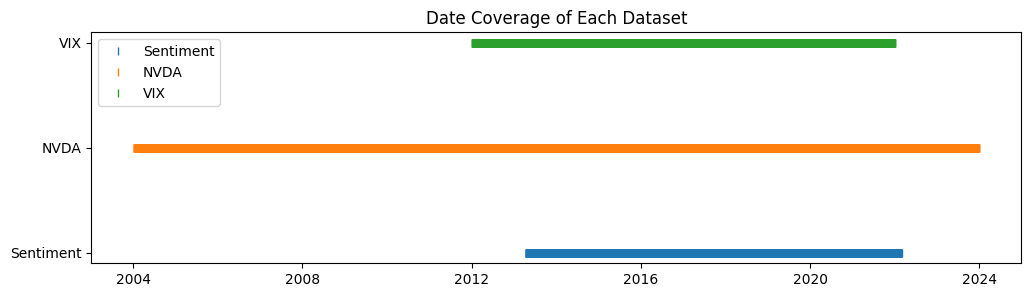

After inner join, total days: 2171
created_at       0
daily_finbert    0
nvda_close       0
nvda_return      0
vix_close        0
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read data
nvda = pd.read_csv("../2_data/nvidia_stock_prices.csv", parse_dates=["Date"])
nvda = nvda.rename(columns={"Date": "created_at", "Close": "nvda_close"})
nvda = nvda.sort_values("created_at")
nvda["nvda_return"] = nvda["nvda_close"].pct_change()
nvda_close = nvda[["created_at", "nvda_close", "nvda_return"]].set_index("created_at")
nvda_close = nvda_close.dropna(subset=["nvda_return"])

vix = pd.read_csv("../2_data/vix_data.csv", parse_dates=["Date"])
vix = vix.rename(columns={"Date": "created_at", "Close": "vix_close"})
vix = vix.sort_values("created_at")
vix_close = vix[["created_at", "vix_close"]].set_index("created_at")


print(daily_sent.columns)
daily_sent["created_at"] = pd.to_datetime(daily_sent["created_at"])
daily_sent = daily_sent[["created_at", "daily_finbert"]].set_index("created_at")


print("Sentiment data:", daily_sent.index.min(), "to", daily_sent.index.max(), "days:", daily_sent.index.nunique())
print("NVDA data:", nvda_close.index.min(), "to", nvda_close.index.max(), "days:", nvda_close.index.nunique())
print("VIX data:", vix_close.index.min(), "to", vix_close.index.max(), "days:", vix_close.index.nunique())


sent_dates = set(daily_sent.index.date)
nvda_dates = set(nvda_close.index.date)
vix_dates = set(vix_close.index.date)

print("Sentiment only dates:", len(sent_dates - nvda_dates - vix_dates))
print("NVDA only dates:", len(nvda_dates - sent_dates - vix_dates))
print("VIX only dates:", len(vix_dates - sent_dates - nvda_dates))
print("All overlap dates:", len(sent_dates & nvda_dates & vix_dates))


plt.figure(figsize=(12, 3))
plt.plot(sorted(sent_dates), [1]*len(sent_dates), '|', label='Sentiment')
plt.plot(sorted(nvda_dates), [2]*len(nvda_dates), '|', label='NVDA')
plt.plot(sorted(vix_dates), [3]*len(vix_dates), '|', label='VIX')
plt.yticks([1,2,3], ['Sentiment', 'NVDA', 'VIX'])
plt.title("Date Coverage of Each Dataset")
plt.legend()
plt.show()

#Inner Merge
merged_inner = (daily_sent
    .join(nvda_close[["nvda_close", "nvda_return"]], how="inner")
    .join(vix_close, how="inner")
    .reset_index()
)
print("After inner join, total days:", len(merged_inner))
print(merged_inner.isnull().sum())


merged_inner.to_csv("../2_data/sentiment_price_vix_inner_aligned.csv", index=False)